<a href="https://colab.research.google.com/github/pachterlab/gget/blob/traffic/gget_traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clone traffic branch of gget repo
!git clone --branch traffic https://github.com/pachterlab/gget.git

Cloning into 'gget'...
remote: Enumerating objects: 3992, done.
remote: Counting objects: 100% (344/344), done.
remote: Compressing objects: 100% (153/153), done.
remote: Total 3992 (delta 244), reused 218 (delta 174), pack-reused 3648
Receiving objects: 100% (3992/3992), 170.34 MiB | 14.66 MiB/s, done.
Resolving deltas: 100% (2493/2493), done.


In [2]:
# Create folders to save new data
!mkdir traffic_archive
!mkdir plots

In [3]:
# Save new traffic info in archive folder
!cp ./gget/traffic/clones.csv ./traffic_archive/$(date +"%Y_%m_%d")_clones.csv
!cp ./gget/traffic/views.csv ./traffic_archive/$(date +"%Y_%m_%d")_views.csv

# Load historical data

In [4]:
import glob
import pandas as pd

In [5]:
# Get filenames of old and new traffic data
traffic_files = glob.glob("./gget/traffic/*.csv") + glob.glob("./gget/traffic_archive/*.csv")

In [6]:
# Build data frame containing all traffic data
for i, file in enumerate(traffic_files):
  if i == 0:
    # Initiate dataframe
    traffic_df = pd.read_csv(file)
    traffic_df = traffic_df.set_index("_date")

  else:
    temp_df = pd.read_csv(file)
    temp_df = temp_df.set_index("_date")
    # Add new data to data frame
    traffic_df = pd.concat([traffic_df, temp_df], axis=1)

# Drop eventual duplicates
traffic_df = traffic_df.drop_duplicates().fillna(0)

traffic_df.head()

,total_views,unique_views,total_clones,unique_clones
_date,,,,
2022-10-29,53,15,0.0,0.0
2022-10-30,22,14,1.0,1.0
2022-10-31,55,30,2.0,1.0
2022-11-01,57,26,2.0,2.0
2022-11-02,36,20,0.0,0.0


# Plotting

In [7]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

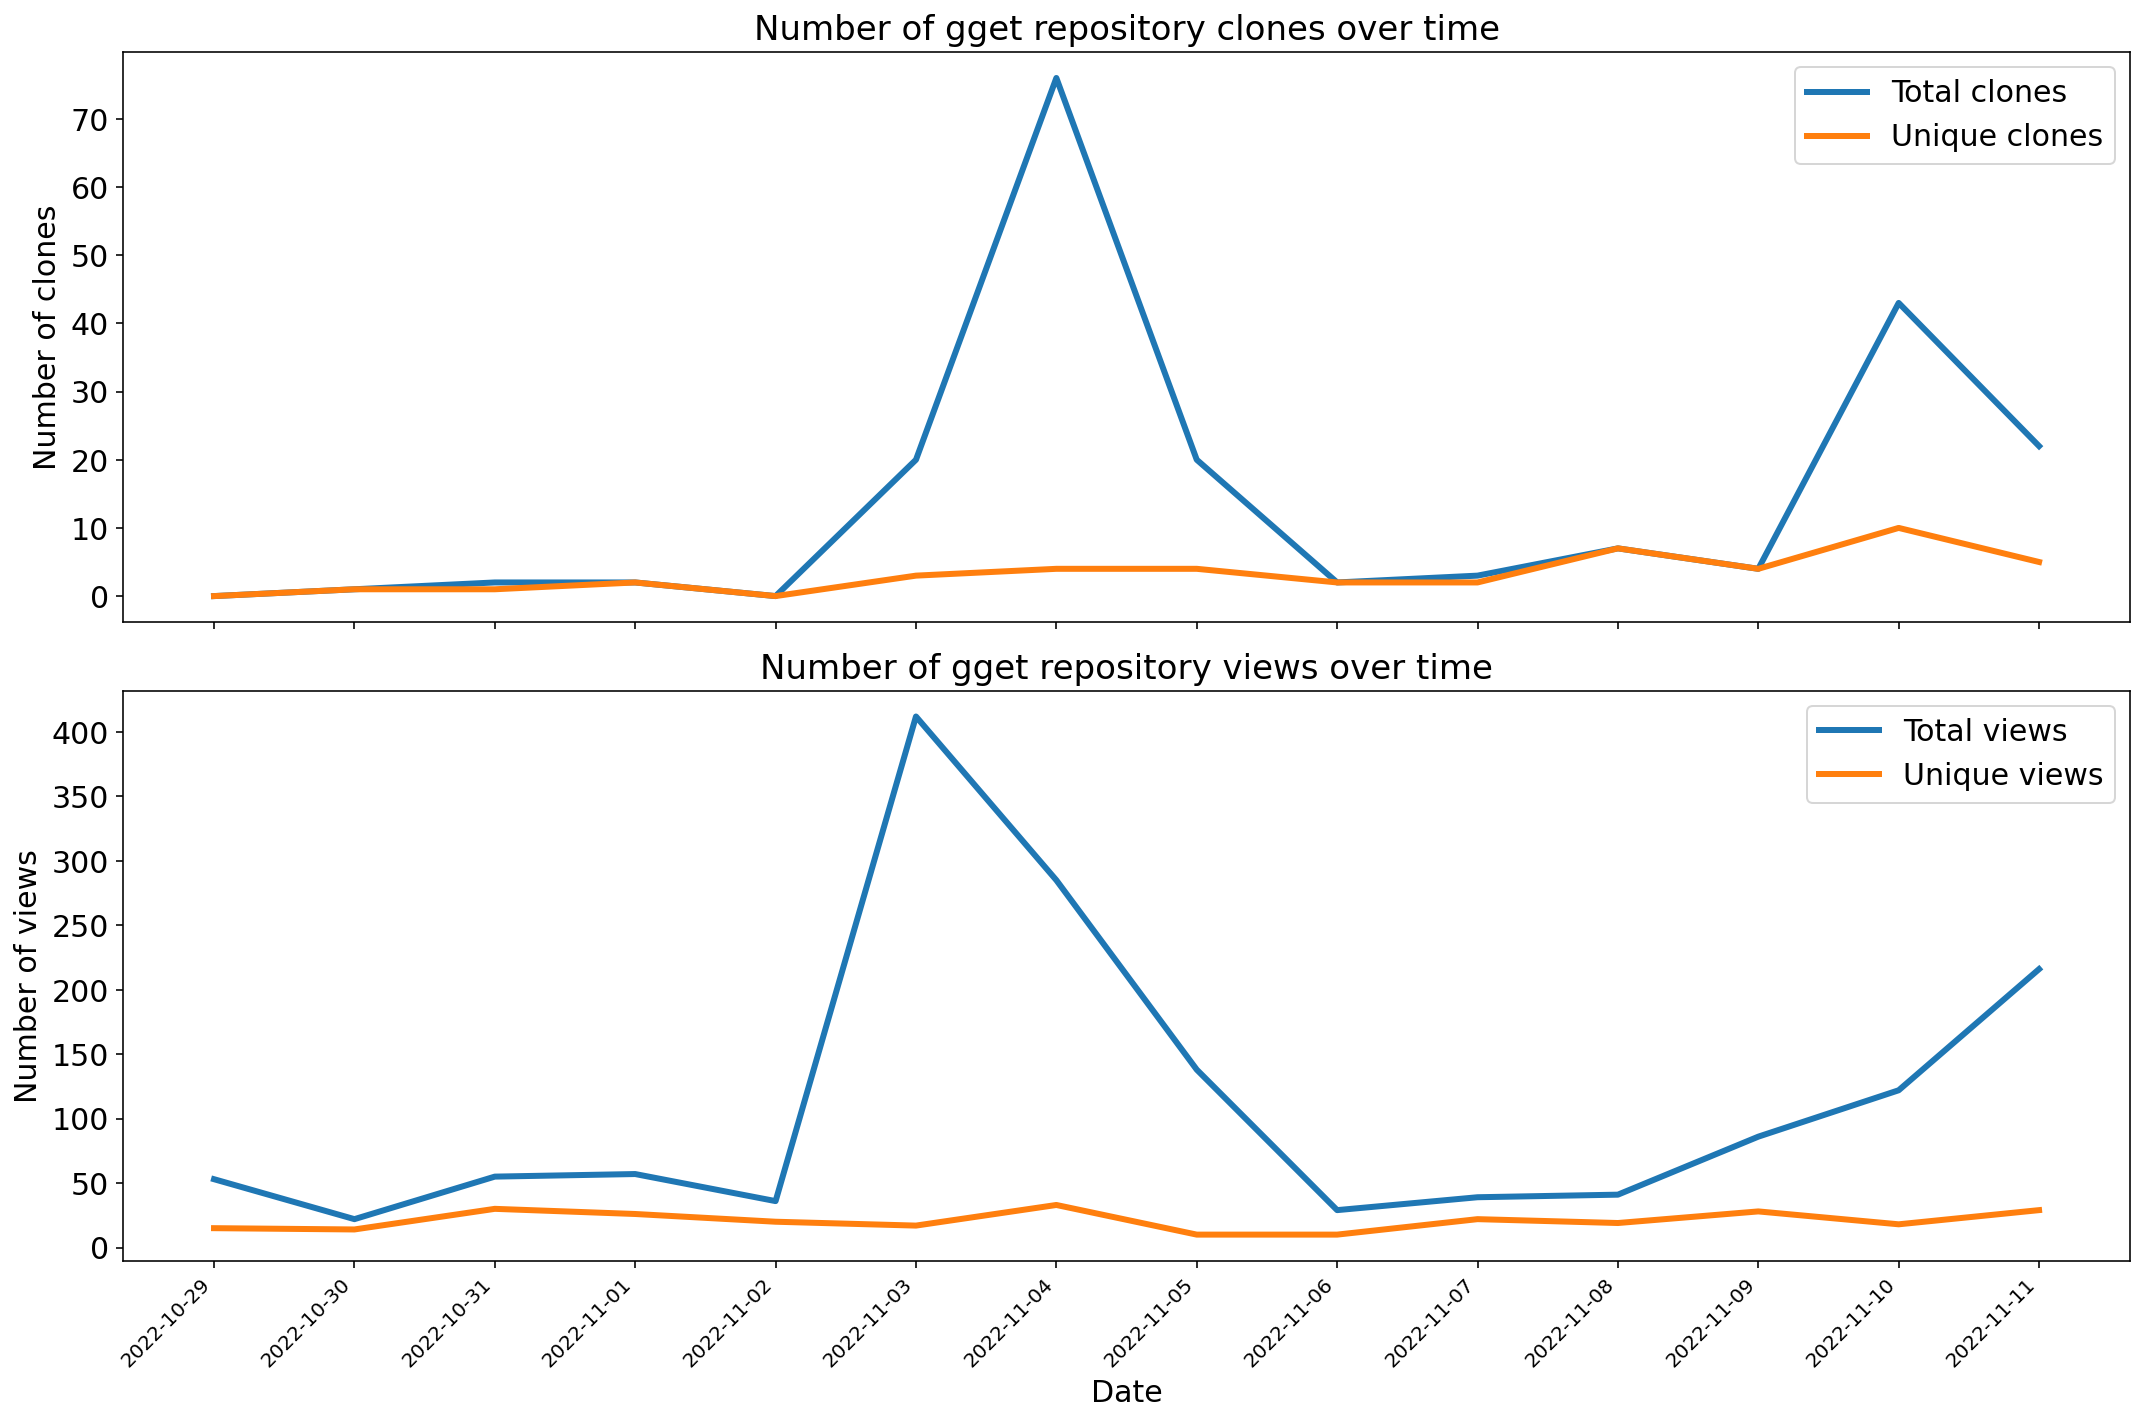

In [8]:
fig, axs = plt.subplots(figsize=(15,10), nrows=2, sharex = True)

fontsize=15
lw = 3

# Plot number of clones
ax = axs[0]
x = traffic_df.index.values
y = traffic_df["total_clones"].values
ax.plot(x, y, label="Total clones", lw=lw)

y = traffic_df["unique_clones"].values
ax.plot(x, y, label="Unique clones", lw=lw)

ax.legend(fontsize=fontsize)

ax.set_title("Number of gget repository clones over time", fontsize=fontsize+2)
ax.set_ylabel("Number of clones", fontsize=fontsize)
ax.tick_params(axis='y', which='major', labelsize=fontsize)

plt.yticks(fontsize=fontsize)

# Plot number of views
ax = axs[1]
y = traffic_df["total_views"].values
ax.plot(x, y, label="Total views", lw=lw)

y = traffic_df["unique_views"].values
ax.plot(x, y, label="Unique views", lw=lw)

ax.legend(fontsize=fontsize)

ax.set_title("Number of gget repository views over time", fontsize=fontsize+2)
ax.set_ylabel("Number of views", fontsize=fontsize)
ax.tick_params(axis='y', which='major', labelsize=fontsize)
ax.set_xlabel("Date", fontsize=fontsize)
ax.set_xticklabels(x, fontsize=fontsize-5, rotation=45, ha="right")

plt.tight_layout()

plt.savefig("./plots/gget_clones_views.png", bbox_inches='tight', dpi=300)

fig.show()

In [9]:
# Remove gget folder
!yes | rm -r gget